In [27]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas openml

In [28]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List
import openml
import sklearn

# Práctica 4: EDA en Series de Tiempo

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado se llama _Digital Currency_ y puede leer su descripción en la siguiente liga

https://www.openml.org/d/43748

In [29]:
# Descarga la metadata del dataset
dataset_info = openml.datasets.get_dataset(43748, download_data=False)

# Obtiene el nombre de la columna a predecir
target = dataset_info.default_target_attribute

(
    features, # Dataframe con las características que se pueden utilizar para predecir
    outputs, # Columna a predecir
    categorical_mask, # Máscara que indica que columnas de todas las características son categoricas
    columns # Lista con el nombre de las características
)= dataset_info.get_data(
    dataset_format="dataframe", target=target
)

categorical_mask = np.array(categorical_mask)
columns = np.array(columns)

In [30]:
print(f"La columna a predecir se llama '{target}'")
print(f"Todas las características son {str(columns)}")
print(f"Las características categóricas son {str(columns[categorical_mask])}")
print(f"Las características numéricas son {str(columns[~categorical_mask])}")

La columna a predecir se llama 'None'
Todas las características son ['City' 'Center' 'Date' 'Year' 'Month' 'Season' 'PM1_0' 'PM2_5' 'PM10'
 'Temperature_F' 'Humidity_%' 'AQI' 'New_cases' 'Cumulative_cases'
 'New_deaths' 'Cumulative_deaths']
Las características categóricas son []
Las características numéricas son ['City' 'Center' 'Date' 'Year' 'Month' 'Season' 'PM1_0' 'PM2_5' 'PM10'
 'Temperature_F' 'Humidity_%' 'AQI' 'New_cases' 'Cumulative_cases'
 'New_deaths' 'Cumulative_deaths']


In [31]:
# Impresión de las características
features

,City,Center,Date,Year,Month,Season,PM1_0,PM2_5,PM10,Temperature_F,Humidity_%,AQI,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,Yangon,7 Miles Mayangone,10/20/2019 0:00,2019,October,Rainy Season,29.60,44.27,52.87,95.67,49.64,122.59,0,0,0,0
1,Yangon,7 Miles Mayangone,10/21/2019 0:00,2019,October,Rainy Season,25.22,37.49,45.21,94.42,51.67,105.90,0,0,0,0
2,Yangon,7 Miles Mayangone,10/22/2019 0:00,2019,October,Rainy Season,24.46,35.84,42.32,95.40,49.26,101.84,0,0,0,0
3,Yangon,7 Miles Mayangone,10/23/2019 0:00,2019,October,Rainy Season,23.42,34.53,41.37,96.39,48.06,98.17,0,0,0,0
4,Yangon,7 Miles Mayangone,10/24/2019 0:00,2019,October,Rainy Season,38.29,56.55,68.59,93.70,57.11,151.54,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5117,Mandalay,Jefferson Center,10/27/2020 0:00,2020,October,Rainy Season,19.50,31.46,37.68,93.33,55.19,91.71,1426,46200,27,1122
5118,Mandalay,Jefferson Center,10/28/2020 0:00,2020,October,Rainy Season,17.36,27.30,31.57,94.07,54.33,82.97,1466,47666,25,1147
5119,Mandalay,Jefferson Center,10/29/2020 0:00,2020,October,Rainy Season,15.30,24.34,27.73,93.45,57.17,76.74,1406,49072,25,1172
5120,Mandalay,Jefferson Center,10/30/2020 0:00,2020,October,Rainy Season,10.18,16.20,18.90,92.64,52.21,59.62,1331,50403,27,1199


## Asignación 1 &#x1F625;

Plantee 2 preguntas que le parezcan interesantes a resolver con este dataset.

1. ¿Cómo ha evolucionado la calidad del aire a lo largo del tiempo en Myanmar? ¿Existen patrones de estacionalidad, tendencias o ciclos en los niveles de contaminación?
2. ¿Hay alguna relación entre los niveles de contaminación y otras variables, como la temperatura o la humedad, a lo largo del tiempo? ¿Existen patrones o correlaciones estacionales o de largo plazo en estos datos?

1. ¿Cómo se han visto afectados los niveles de contaminación por la pandemia de COVID-19? ¿Hay alguna diferencia en la evolución de los niveles de contaminación entre las distintas ciudades de Myanmar?
2. ¿Hay patrones de variabilidad en los niveles de contaminación a lo largo de un día? ¿Varían estos patrones en función de la ciudad o de la época del año?

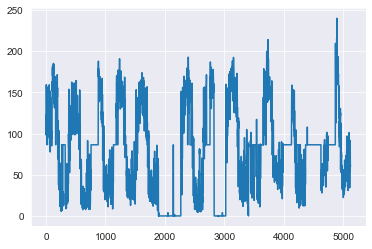

In [32]:
plt.plot(features.AQI)

## Asignación 2 &#x1F921;

Apoyado de las técnicas vistas en clase, realice un análisis exploratorio de datos (EDA) que le permita responder de manera guiada las preguntas planteadas anteriormente. Debe apoyarse de visualizaciones y métricas para respaldar sus respuestas.

¿Hay alguna relación entre los niveles de contaminación y otras variables, como la temperatura o la humedad, a lo largo del tiempo? ¿Existen patrones o correlaciones estacionales o de largo plazo en estos datos?

¿Porque buscar una relación entre estas? Por el hecho de la influencia que tiene el efecto invernadero en el clima de nuestro día a día.

<AxesSubplot:>

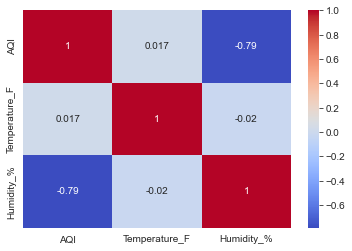

In [43]:
# Seleccionar las columnas relevantes
df = features[['Date', 'AQI', 'Temperature_F', 'Humidity_%']]

# Convertir la columna de fecha a un objeto datetime
# df['Date'] = pd.to_datetime(df['Date'])
df = df.drop_duplicates(subset=['Date'])
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M')

# Establecer la fecha como índice
df.set_index('Date', inplace=True)

# Calcular la correlación entre las variables
corr_matrix = df.corr()

# Visualizar la matriz de correlación con un mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Como se ve, solo existe una relación positiva entre **AQI** Y **TEMPERATURE** de ahí en fuera no, por lo que podemos asumir que la humedadno tiene que ver con la calidad del aire.

Para comprobarlo, tenemos las siguientes gráficas:

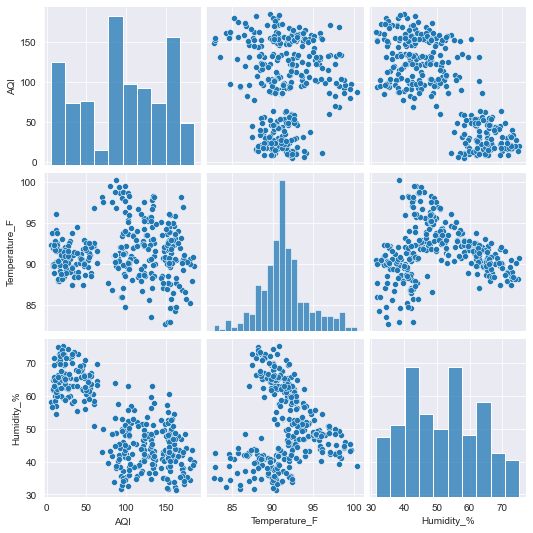

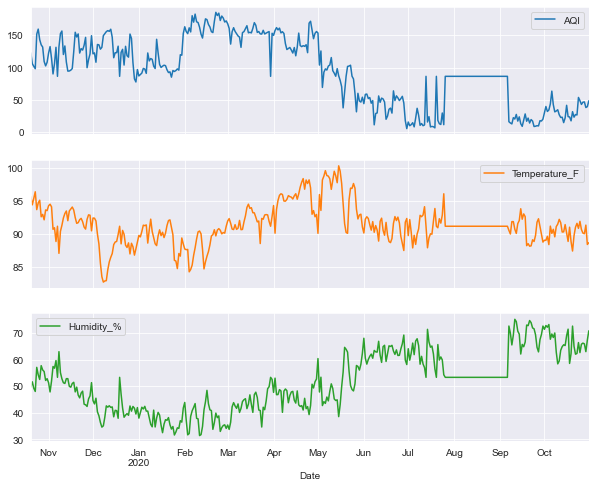

In [42]:
# Visualizar la relación entre las variables a lo largo del tiempo
sns.pairplot(df)

# Visualizar la serie de tiempo de los niveles de contaminación, temperatura y humedad
df.plot(subplots=True, figsize=(10, 8))
plt.show()

El primer conjunto de gráficas si hubiera una correlación positiva los puntos estarían en la parte superior e inclinados a la iquierda, no como se observa en las gráficas que están abajo y a la derecha. Por ultimo en la última gráfica podemos ver que no hay una estacionaridad clara en ninguna de estas tres columnas, pero se ve un decremento a traves del tiempo, lo que nos lleva a la siguiente pregunta:

¿Cómo se han visto afectados los niveles de contaminación por la pandemia de COVID-19? 

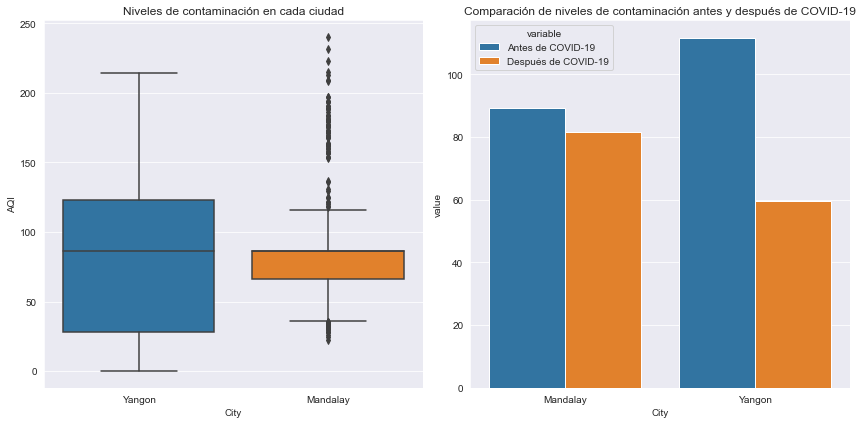

In [35]:
# Limpiar y preprocesar los datos
copia = features
copia['Date'] = pd.to_datetime(copia['Date'])
copia = copia.set_index('Date')

# Paso 2: Analizar los datos
# Calcular estadísticas descriptivas de los niveles de contaminación en cada ciudad, tanto antes como después de la pandemia de COVID-19
before_covid = copia[copia.index < '2020-03-01'].groupby('City')['AQI'].mean()
after_covid = copia[copia.index >= '2020-03-01'].groupby('City')['AQI'].mean()

# Graficar los datos para visualizar cualquier patrón o tendencia en los niveles de contaminación a lo largo del tiempo y entre las distintas ciudades
sns.set_style('darkgrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.boxplot(data=copia, x='City', y='AQI', ax=axs[0])
axs[0].set_title('Niveles de contaminación en cada ciudad')
sns.barplot(data=pd.DataFrame({'Antes de COVID-19': before_covid, 'Después de COVID-19': after_covid}).reset_index().melt(id_vars='City'), x='City', y='value', hue='variable', ax=axs[1])
axs[1].set_title('Comparación de niveles de contaminación antes y después de COVID-19')
plt.tight_layout()
plt.show()

Como podemos ver, en la ciudad de Mandalay hay muchos valores atípicos, los vamos a dejar puesto que modificarlos influencia sobre la realidad del acontecimiento en cuestion (la contaminación) y como podemos ver si hay un descenso en la contaminación